In [1]:
from classes import *
from helpers import *
from shape_functions import *
import numpy as np
import matplotlib.pyplot as plt

### test shape functions 1d

In [2]:
h = 1
xdom = np.linspace(-2*h,2*h,1005)[1:]
ydom = np.linspace(-2*h,2*h,1005)[1:]

In [3]:
x0max = 15
domain = np.linspace(-2*h,x0max+2*h)

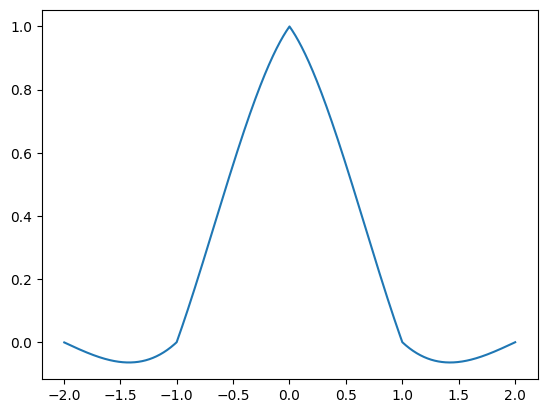

In [4]:
plt.plot(xdom,[phi3(x,h) for x in xdom])
plt.show()

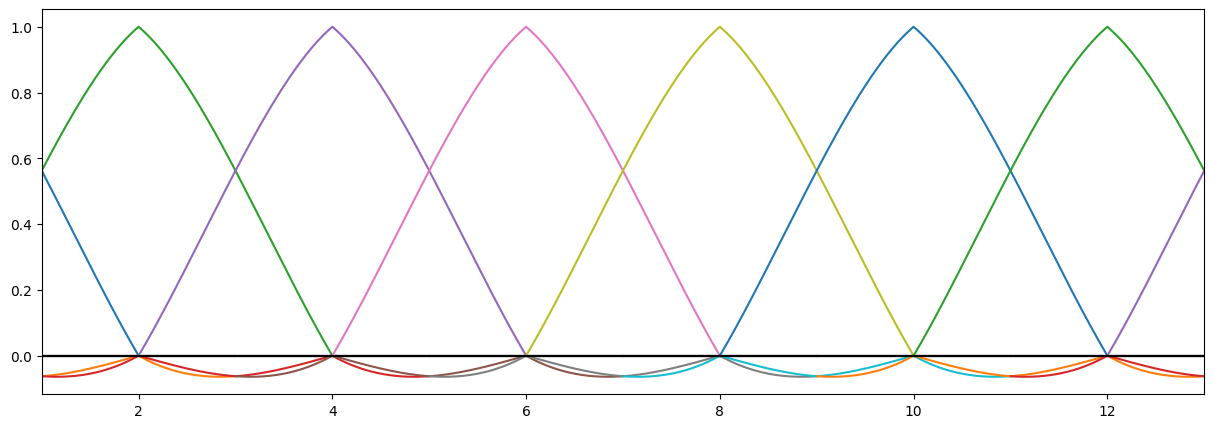

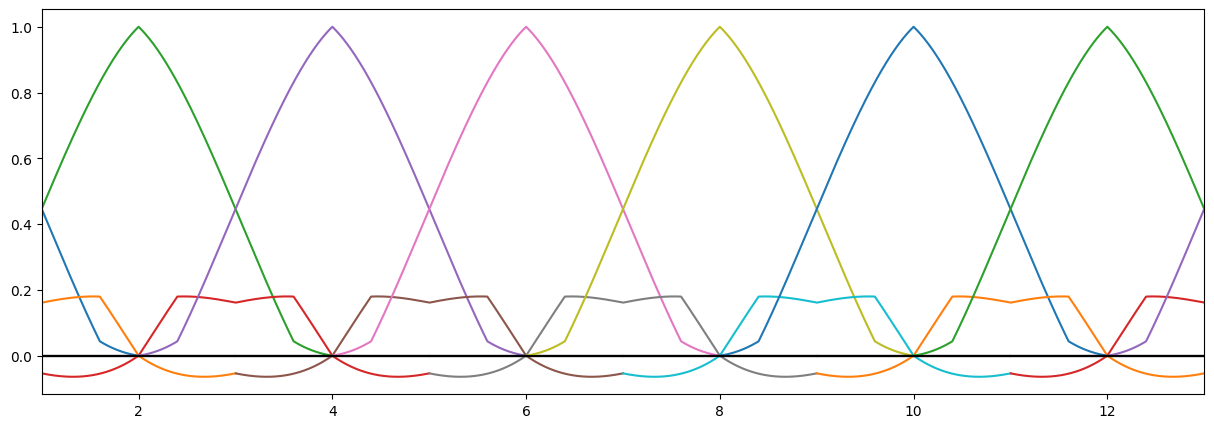

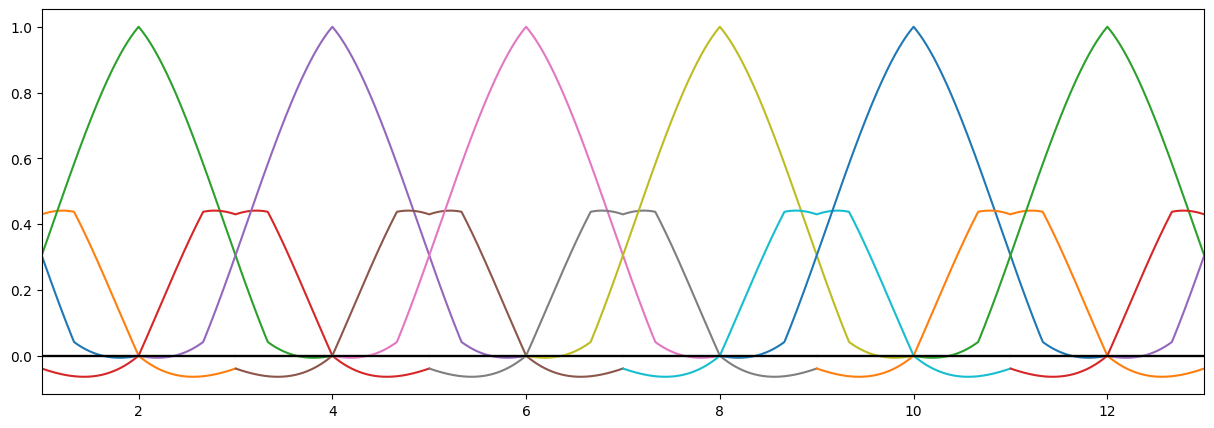

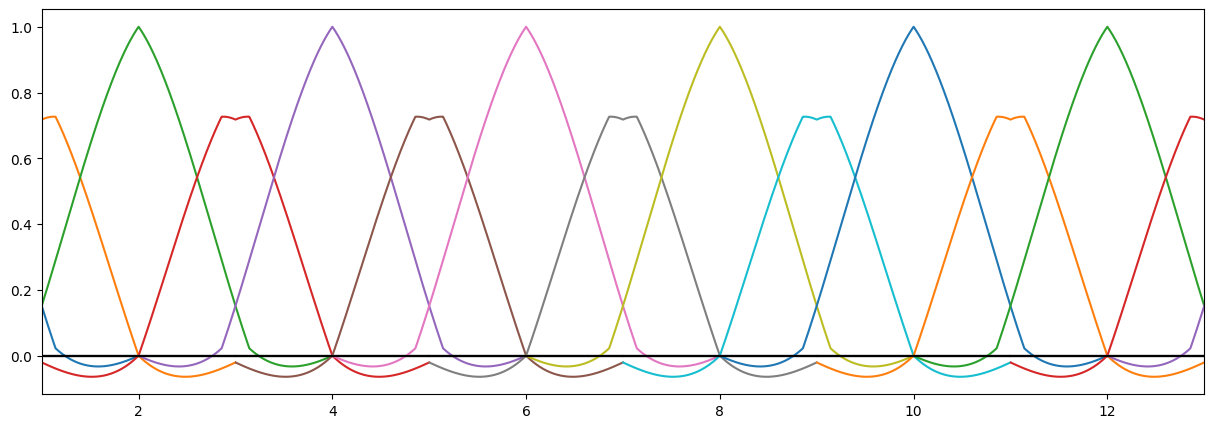

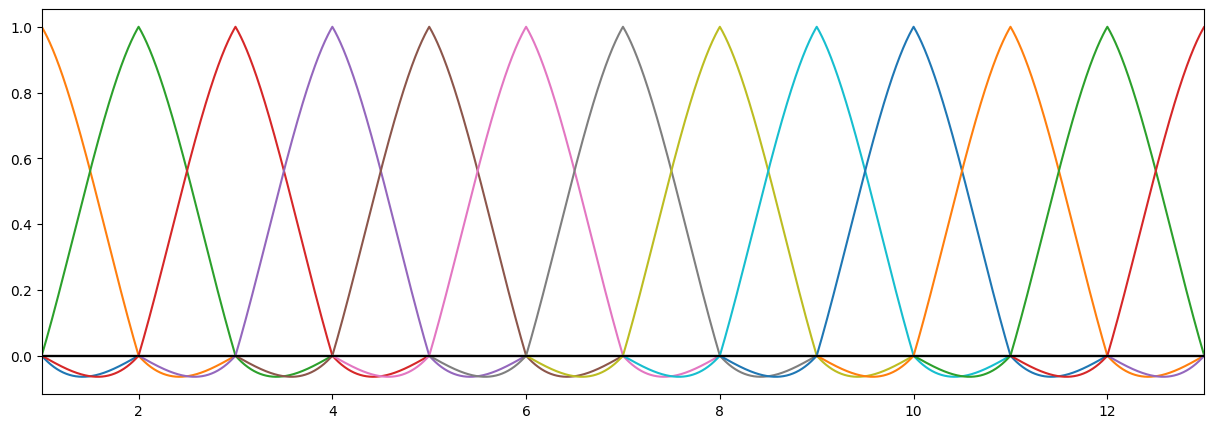

In [5]:
for s in np.linspace(0.5,1,5):
    fig = plt.figure(figsize=(15,5))
    for x0 in range(x0max):
        coll = 1-x0%2
        plt.plot(xdom+x0,[phi3_interface(x,h,s,coll) for x in xdom],c='C'+str(x0))
        plt.plot([x0-2*h,x0+2*h],[0,0],'k')
    plt.xlim(h,x0max-2*h)
    plt.show()

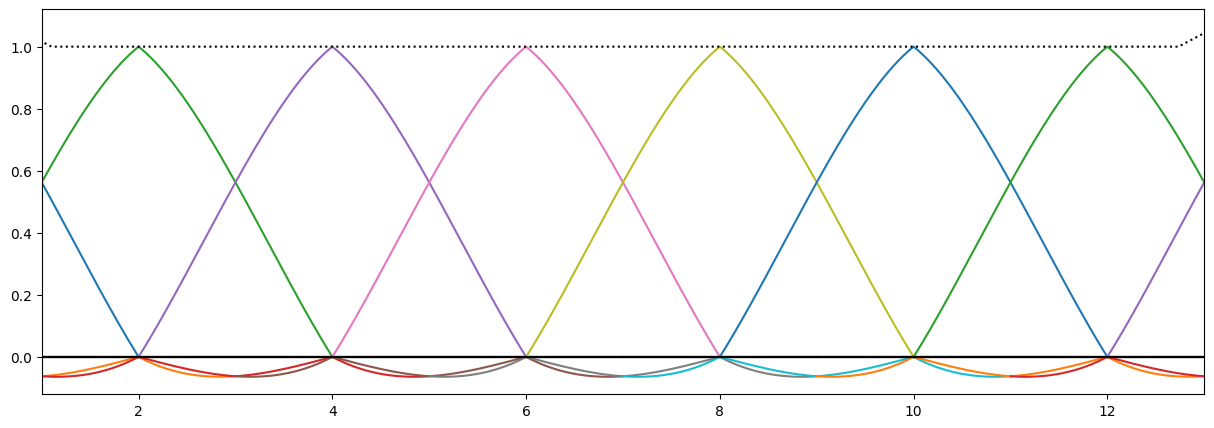

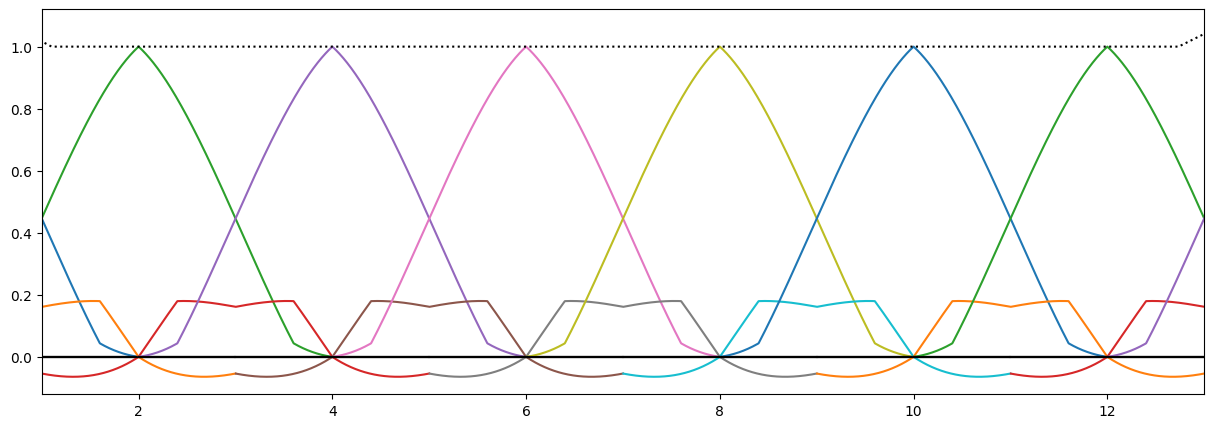

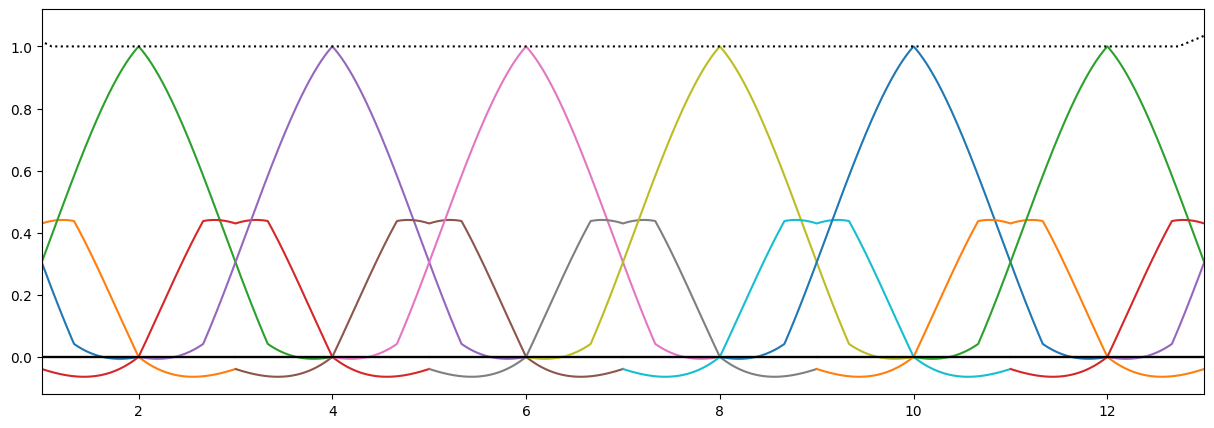

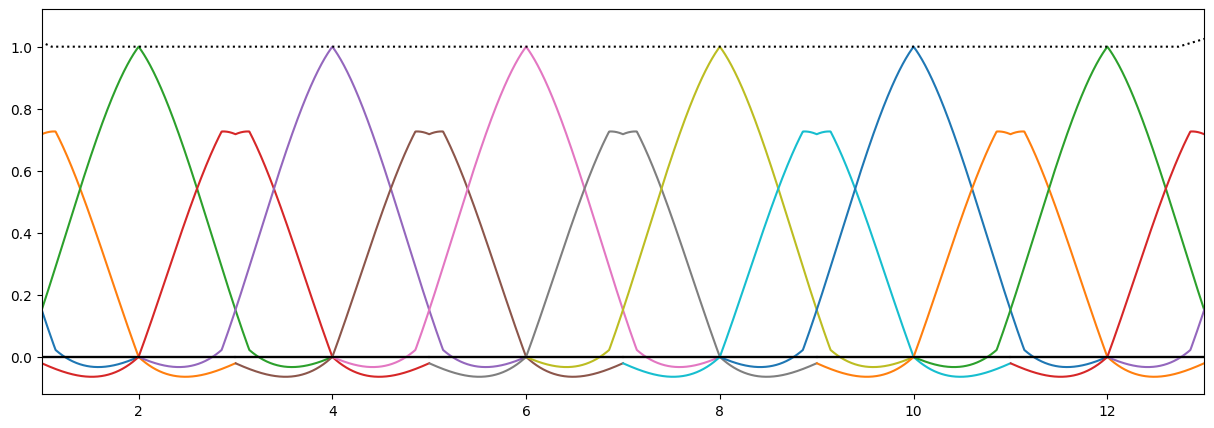

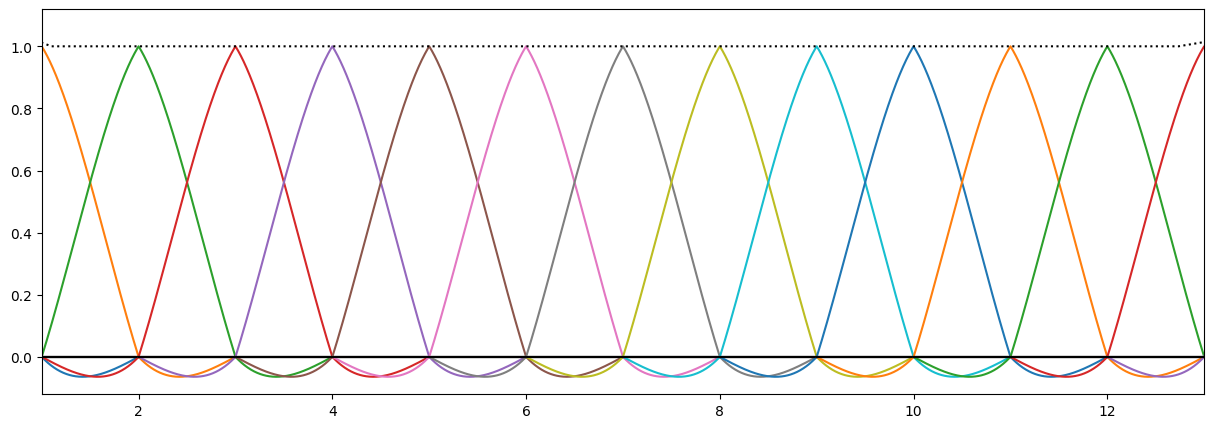

In [6]:
for s in np.linspace(0.5,1,5):
    pou = np.zeros_like(domain)
    fig = plt.figure(figsize=(15,5))
    for x0 in range(x0max):
        plt.plot(xdom+x0,[phi3_interface_eval(x+x0,h,x0,s) for x in xdom],c='C'+str(x0))
        plt.plot([x0-2*h,x0+2*h],[0,0],'k')
        pou += np.array([phi3_interface_eval(x,h,x0,s) for x in domain])
    plt.plot(domain,pou,':k')
    plt.xlim(h,x0max-2*h)
    plt.show()

### test quadrature

In [2]:
from scipy.integrate import dblquad

In [16]:
def test_quad(f,a,b,c,d,qpn=5):
    func_rev = lambda y,x: f(x,y)
    scipy_val = dblquad(func_rev,a,b,c,d)[0]
    my_val = gauss(f,a,b,c,d,qpn)
    print(scipy_val,my_val,abs(scipy_val-my_val))

In [17]:
func = lambda x,y: np.sin(x)*np.exp(y)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,15)

-220091.86174086106 -220091.86174086184 7.8580342233181e-10


In [18]:
func = lambda x,y: np.sin(x)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,8)

97184.398697734 97184.39869773398 1.4551915228366852e-11


In [19]:
func = lambda x,y: np.sin(x)*np.cos(y)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,8)

97199.57051647456 97199.57051646586 8.702045306563377e-09


In [23]:
func = lambda x,y: x**6*y+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,5)

2636619.428571429 2636619.42857143 9.313225746154785e-10


### test next thing